<h2>Visaualizing the distribution of a dataset</h2>

In [1]:
# Some tools for examining univariate and bivariate distributions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(color_codes=True)

<h3>Plotting univariate distributions</h3>

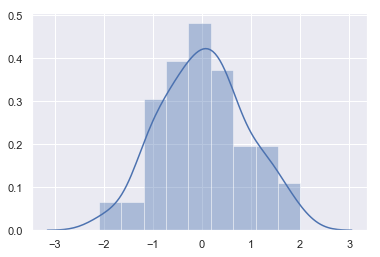

In [2]:
# the most convenient way to quick look at univariate
# distribution is the distplot() function
x = np.random.normal(size=100)
sns.distplot(x);

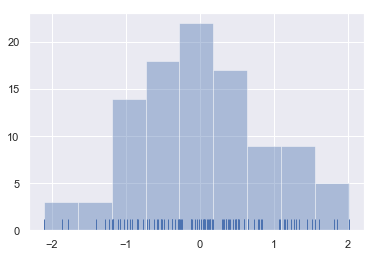

In [3]:
# without density curve(kernel density estimation) but adding
#a rug plot, which draws small vertical ticks at each observation
sns.distplot(x, kde=False, rug=True);

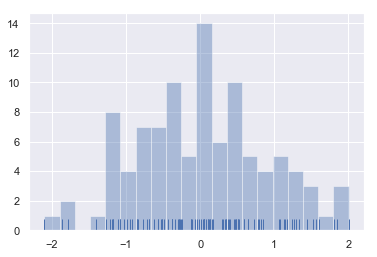

In [4]:
# default number of bins is guessed by some rule, but may
# be changed for some purposes or revealing other features
sns.distplot(x, bins=20, kde=False, rug=True);

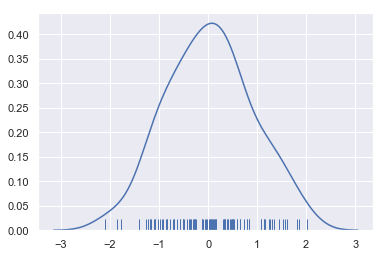

In [5]:
# Kernel density estimation(performed computationally by
# summing normal/Gaussian curves centered at each value)
sns.distplot(x, hist=False, rug=True);

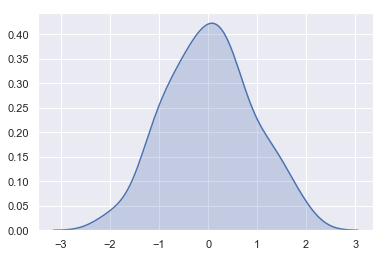

In [6]:
# Using kdeplot() function provides more direct interface
# with easier access to other options
sns.kdeplot(x, shade=True);

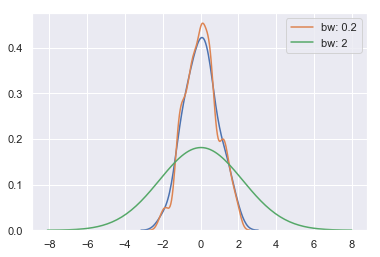

In [7]:
# using the bandwidth parameter to control how tightly the
# estimation is fit to the data(much like bin size in histogram)
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw: 0.2')
sns.kdeplot(x, bw=2, label='bw: 2')
plt.legend();

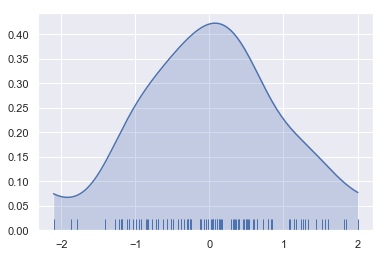

In [8]:
# controlling how far past the extreme values the curve
# is drawn, possible also to plot another function(rugplot)
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

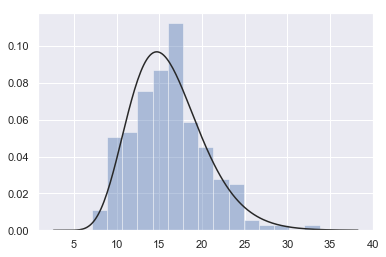

In [9]:
# Fitting parametric distribution to a dataset to visually
# evaluate how closely it corresponds to the  oberved data
x = np.random.gamma(16, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

<h3>Plotting bivariate distributions</h3>

In [57]:
# jointplot() function is the best to visualize bivariate distribution
# it creates multi-panel figure that shows both the bivariate
#(or joint) relationship between 2 vars along with the
# univariate(or marginal) distribution of each separate axes
np.set_printoptions(precision=3, suppress=True)
mean, cov = [0,1], [(1,.5), (.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

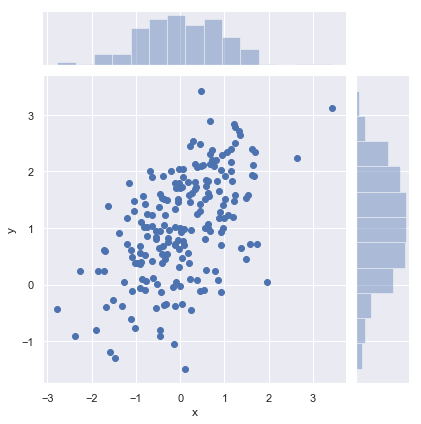

In [56]:
# plt.scatter() is default function of jointplot() - scatter
# is the most familiar way to visualize bivariate distribution
sns.jointplot(x='x', y='y', data=df);

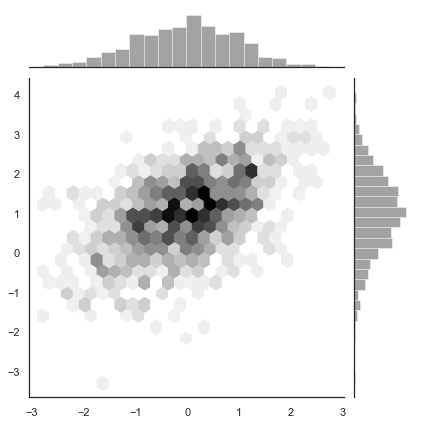

In [61]:
# Hexbin plots - histogram version for bivariate distribution
# it shows counts of observations that fall within hexagonal
# bins - for relatively large datasets
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='k');


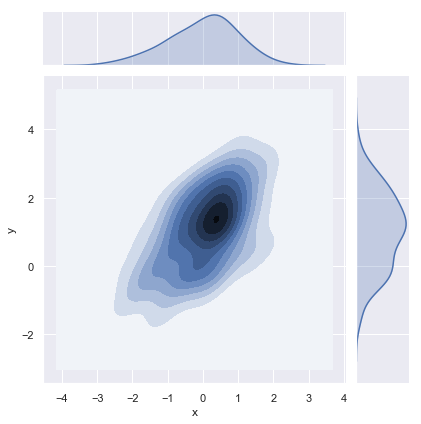

In [64]:
# Kernel density estimation(smoothing curve to visualize the shape of data)
sns.jointplot(x='x', y='y', data=df, kind='kde');

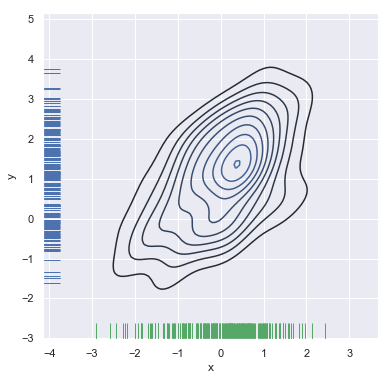

In [68]:
# the same but with the use of kdeplot() as an axes-level function
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

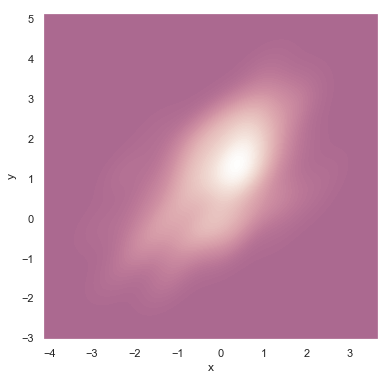

In [80]:
# increasing the number of contour levels
# to show the bivariate density more continuosly
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.5, light=1,
                            reverse=True,)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

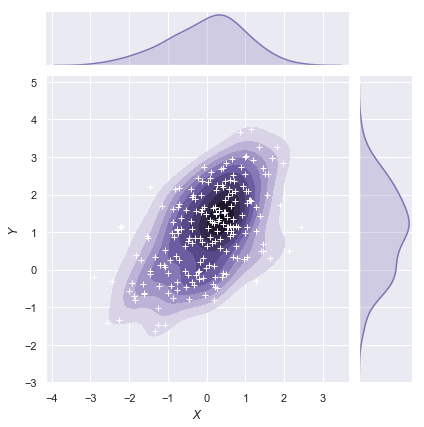

In [108]:
# after plotting JointGrid(function managing the figure),
# is still possible to add more layers ot to tweak other aspects
# s=size, c=color - params for scatters
g = sns.jointplot(x='x', y='y', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0) # draws grid on main plot
g.set_axis_labels('$X$', '$Y$'); # labels etiquettes

<h3>Visualizing pairwise relationships in a dataset</h3>

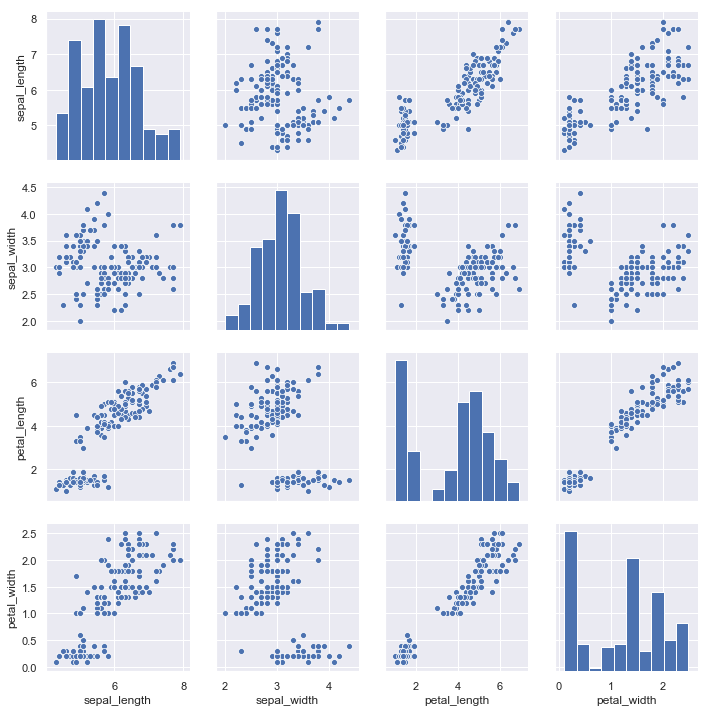

In [109]:
# pairplot() function creates a matrix of axes and shows
# the relationship for each pair of columns in DataFrame
# plus it draws univariate distributions on the diagonal Axes
iris = sns.load_dataset('iris')
sns.pairplot(iris);

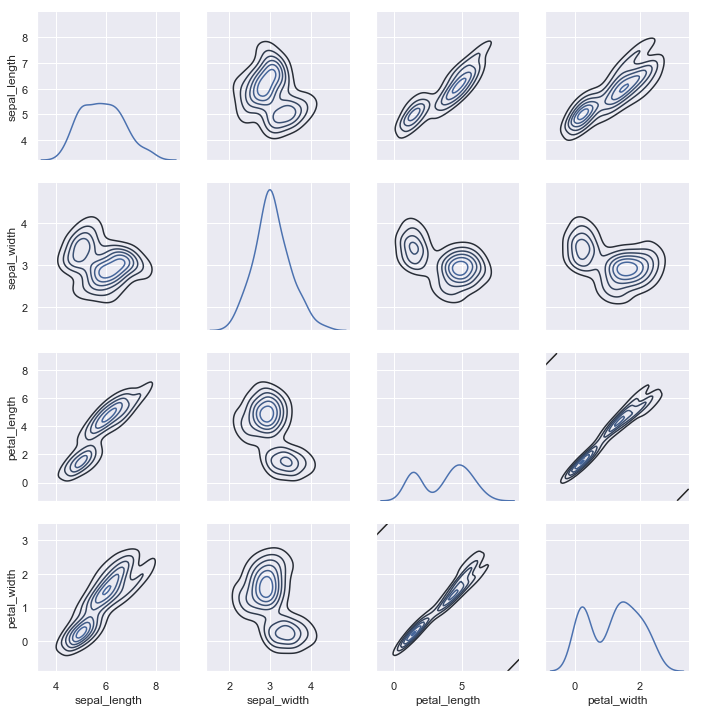

In [112]:
# pairplot() is built on top of a PairGrid object, which
# can be used directly for more flexibility
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);